# What is Factor Analysis
    Factor analysis is a linear statistical model. It is used to explain the variance among the observed variable and condense a set of the observed variable into the unobserved variable called factors. Observed variables are modeled as a linear combination of factors and error terms (Source). Factor or latent variable is associated with multiple observed variables, who have common patterns of responses. Each factor explains a particular amount of variance in the observed variables. It helps in data interpretations by reducing the number of variables.

Factor Analysis Vs. Principle Component Analysis

    PCA components explain the maximum amount of variance while factor analysis explains the covariance in data.
    PCA components are fully orthogonal to each other whereas factor analysis does not require factors to be orthogonal.
    PCA component is a linear combination of the observed variable while in FA, the observed variables are linear combinations of the unobserved variable or factor.
    PCA components are uninterpretable. In FA, underlying factors are labelable and interpretable.
    PCA is a kind of dimensionality reduction method whereas factor analysis is the latent variable method.
    PCA is a type of factor analysis. PCA is observational whereas FA is a modeling technique.


In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bfi.csv')
dd = pd.read_csv('dd.csv')

In [3]:
dd

,Unnamed: 0,Column_name,Def,L factor
0,0,A1,Am indifferent to the feelings of others.,Agreeableness
1,1,A2,Inquire about others' well-being.,Agreeableness
2,2,A3,Know how to comfort others.,Agreeableness
3,3,A4,Love children.,Agreeableness
4,4,A5,Make people feel at ease.,Agreeableness
5,5,C1,Am exacting in my work.,Conscientiousness
6,6,C2,Continue until everything is perfect.,Conscientiousness
7,7,C3,Do things according to a plan.,Conscientiousness
8,8,C4,Do things in a half-way manner.,Conscientiousness
9,9,C5,Waste my time.,Conscientiousness


In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.head(10)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
6,2.0,5.0,5.0,3.0,5.0,5.0,4.0,4.0,2.0,3.0,...,1.0,1.0,5.0,2,5.0,6.0,1.0,1,NaN,18
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
8,4.0,3.0,6.0,3.0,3.0,6.0,6.0,3.0,4.0,5.0,...,3.0,3.0,6.0,6,6.0,6.0,1.0,1,1.0,19
9,2.0,5.0,6.0,6.0,5.0,6.0,5.0,6.0,2.0,1.0,...,2.0,4.0,5.0,1,5.0,5.0,2.0,2,NaN,17


In [6]:
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)


In [7]:
# Dropping missing values rows
df.dropna(inplace=True)

In [8]:
# Before we start let's build a correlation martix and see how these columns are correlated because
# Covariance is the foundation on which factor analysis is built on

In [9]:
cormat = df.corr()

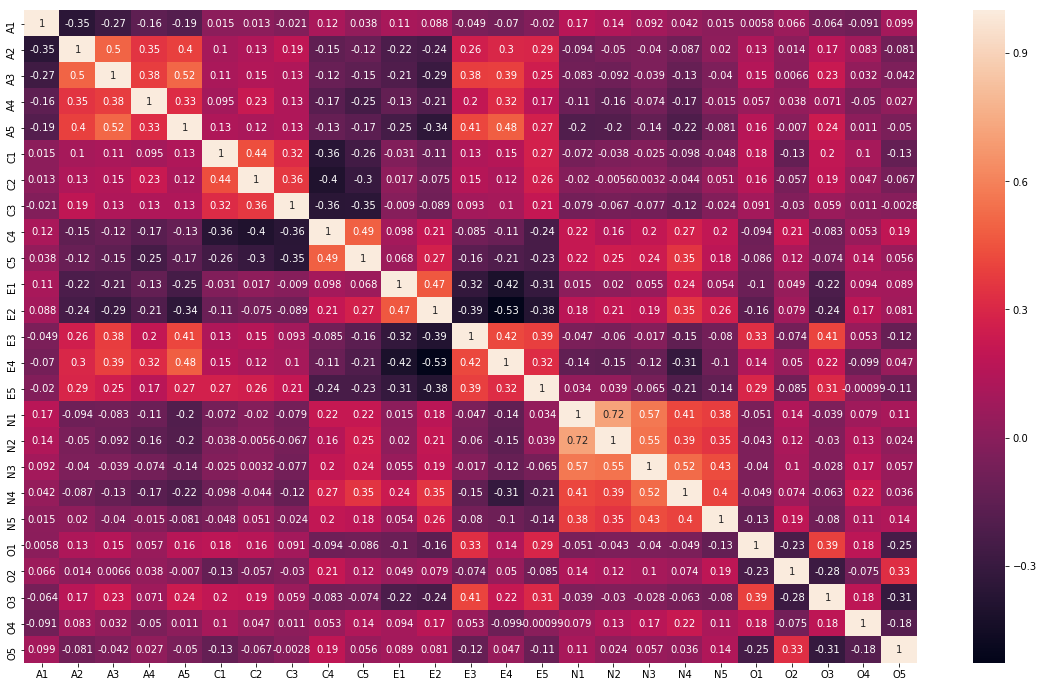

In [10]:
import seaborn as sns
plt.figure(figsize= (20,12))
sns.heatmap(cormat, annot = True)
plt.show()

In [11]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()

In [17]:
fa.fit_factor_analysis(df, 25) #since the number of features is 25

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,...,Factor16,Factor17,Factor18,Factor19,Factor20,Factor21,Factor22,Factor23,Factor24,Factor25
A1,0.229792,0.021606,0.138674,-0.010095,0.418758,-0.305875,0.070913,0.062144,0.023662,0.006903,...,-0.032956,0.049807,-0.016063,0.002439,0.052504,0.006695,-0.023787,0.009734,-0.004240,0.0
A2,-0.480104,-0.303380,-0.187023,0.152259,-0.381870,0.217926,0.138261,-0.160018,-0.105431,-0.039428,...,-0.076062,-0.010084,-0.064384,-0.007589,0.021448,0.033919,0.013776,0.000064,-0.001917,0.0
A3,-0.536712,-0.306234,-0.249387,0.124709,-0.297484,-0.001497,0.120006,0.130086,0.108530,0.028416,...,0.039778,0.099506,-0.048922,0.057510,0.018358,-0.035650,-0.025903,0.005254,-0.007359,0.0
A4,-0.426594,-0.120649,-0.117918,0.297697,-0.171757,-0.022415,0.009532,0.211934,0.015848,-0.234953,...,0.064968,0.024836,0.048930,-0.041150,0.006245,-0.001155,-0.000046,0.007185,0.010546,0.0
A5,-0.586529,-0.184597,-0.265869,0.056387,-0.176803,-0.141153,0.004222,0.051255,0.141727,0.148279,...,-0.030026,-0.068557,0.106772,-0.008105,-0.024692,0.016779,-0.013239,-0.011038,0.004622,0.0
C1,-0.349387,-0.135899,0.469229,0.097285,0.021106,-0.125413,-0.085616,-0.178471,0.172739,0.046481,...,-0.010093,0.102804,-0.026191,0.027582,0.001773,0.009176,0.022745,0.003010,0.011958,0.0
C2,-0.345237,-0.204315,0.520239,0.273006,-0.018705,-0.190141,-0.097111,-0.051719,0.036822,-0.242275,...,-0.019292,-0.033001,0.008651,0.000222,-0.037245,-0.009203,0.001235,-0.001799,-0.008221,0.0
C3,-0.324074,-0.055285,0.371993,0.305886,-0.019703,-0.023919,0.056769,-0.123817,-0.135341,0.172842,...,0.065497,0.023967,0.048788,-0.035289,-0.016817,-0.011307,0.008352,0.001257,0.000036,0.0
C4,0.476324,-0.111568,-0.481752,-0.200549,-0.032326,-0.276088,0.085921,-0.040252,-0.082187,-0.060462,...,-0.062343,0.083493,0.026345,-0.010690,-0.060679,-0.036727,0.015220,0.000087,0.001163,0.0
C5,0.506554,-0.160399,-0.315932,-0.285909,-0.128256,-0.088023,-0.023105,-0.268485,0.154970,-0.125001,...,0.073529,-0.022897,0.013934,-0.010607,0.000565,0.031887,0.001453,0.009326,-0.001820,0.0


# Eigen Values
    Eigenvalues represent variance explained each factor from the total variance. It is also known as characteristic roots.

In [16]:
ev = fa.get_eigenvalues()
pd.DataFrame(ev)

""


In [15]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

NameError: name 'ev' is not defined

In [58]:
fa = FactorAnalyzer(6, rotation ='varimax')
fa.fit_transform(df)

array([[-0.35050587,  0.03358311, -1.3002851 , -0.51213484, -1.42947497,
        -0.69327465],
       [ 0.08182885,  0.57099876, -0.61213751, -0.20134245, -0.24335182,
        -0.01691128],
       [ 0.56468384,  0.32727718,  0.0830209 , -0.82434468,  0.2101693 ,
        -0.23617186],
       ...,
       [-0.16606097,  0.70260177,  0.76253293, -1.00085349,  0.94189415,
        -0.42756803],
       [ 0.94217406,  0.70098364,  0.11980022, -2.2071873 ,  0.68202633,
        -0.19390538],
       [-1.53125513, -1.42425821, -0.26009483, -1.46503886,  0.06892042,
        -1.42812813]])

# What are the factor loadings?

    The factor loading is a matrix which shows the relationship of each variable to the underlying factor. It shows the correlation coefficient for observed variable and factor. It shows the variance explained by the observed variables.

In [65]:
Factor_loadings = pd.DataFrame(fa.loadings_, columns=['Factor1','Factor2','Factor3','Factor4','Factor5','Factor6'] )

In [70]:
categories = []
for i in df.columns:
    categories.append(i[:1])

In [71]:
Factor_loadings['Features'] = categories

In [76]:
Grouped_Factor_loadings = Factor_loadings.groupby('Features').sum()

In [221]:
Grouped_Factor_loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
Features,,,,,,
A,-0.112403,1.253504,0.645323,1.610379,-0.109695,0.637954
C,0.524449,-0.099567,0.596979,0.003276,0.148369,0.707589
E,0.152710,0.447676,0.492419,0.251778,0.217427,0.706200
N,3.422135,-0.481465,-0.335259,-0.244640,-0.177890,0.094007
O,0.418592,0.357345,0.088303,0.201903,0.321450,0.878164


In [73]:
Latent_factors = ['Agreeableness','Conscientiousness','Extraversion','Neuroticism','Opennness']

In [74]:
import seaborn as sns

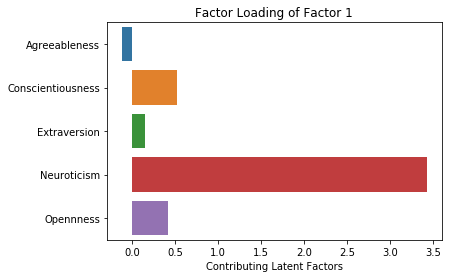

In [80]:
sns.barplot(y = Latent_factors, x = Grouped_Factor_loadings['Factor1'], orient= 'h')
plt.title('Factor Loading of Factor 1')
plt.xlabel("Factor 1's Laodings")
plt.xlabel("Contributing Latent Factors")
plt.show()

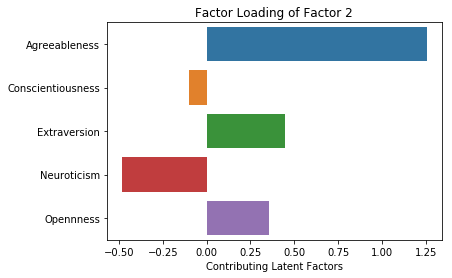

In [81]:
sns.barplot(y = Latent_factors, x = Grouped_Factor_loadings['Factor2'], orient= 'h')
plt.title('Factor Loading of Factor 2')
plt.xlabel("Factor 2's Laodings")
plt.xlabel("Contributing Latent Factors")
plt.show()

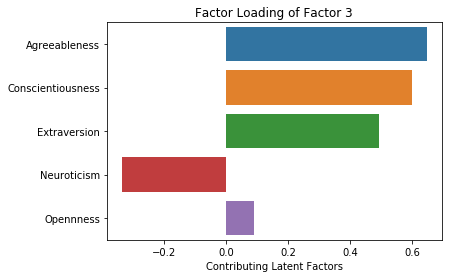

In [82]:
sns.barplot(y = Latent_factors, x = Grouped_Factor_loadings['Factor3'], orient= 'h')
plt.title('Factor Loading of Factor 3')
plt.xlabel("Factor 3's Laodings")
plt.xlabel("Contributing Latent Factors")
plt.show()

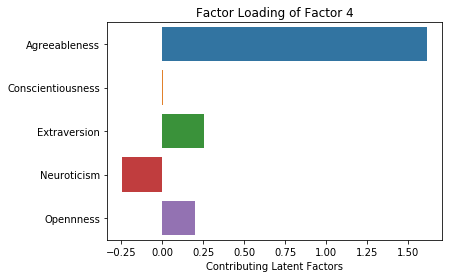

In [83]:
sns.barplot(y = Latent_factors, x = Grouped_Factor_loadings['Factor4'], orient= 'h')
plt.title('Factor Loading of Factor 4')
plt.xlabel("Factor 4's Laodings")
plt.xlabel("Contributing Latent Factors")
plt.show()

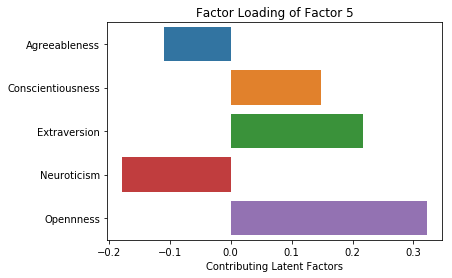

In [84]:
sns.barplot(y = Latent_factors, x = Grouped_Factor_loadings['Factor5'], orient= 'h')
plt.title('Factor Loading of Factor 5')
plt.xlabel("Factor 5's Laodings")
plt.xlabel("Contributing Latent Factors")
plt.show()

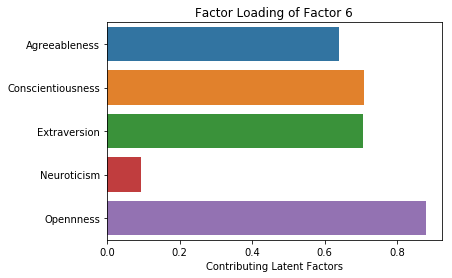

In [85]:
sns.barplot(y = Latent_factors, x = Grouped_Factor_loadings['Factor6'], orient= 'h')
plt.title('Factor Loading of Factor 6')
plt.xlabel("Factor 6's Laodings")
plt.xlabel("Contributing Latent Factors")
plt.show()

In [107]:
# Get variance of each factor
fact_var = pd.DataFrame(np.array(fa.get_factor_variance()), index= ['SS Loadings','Proportion Var','Cumulative Var'])


In [109]:
fact_var.loc['Proportion Var',:].sum()

0.45005303698084836

    # P.S only 45 percentage of the variablity of the features are explained by the 6 latent factors
    # But if a market reserch analyst or if you doing behavioural study for a Psychometric analysis.
    # These latnent factor are greatly useful

In [135]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
from sklearn import datasets

NameError: name '__version__' is not defined

In [136]:
iris = datasets.load_iris()
X = iris.data
Column_names = iris.feature_names
df_iris = pd.DataFrame(X, columns= Column_names)

In [137]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [195]:
X = df_iris.iloc[:,:3]
y = df_iris.iloc[:,3]

In [196]:
fa = FactorAnalyzer(2, rotation ='promax')
fa.fit_transform(X)

array([[-1.13106902,  1.25919909],
       [-1.29927572,  0.77919393],
       [-1.43141651,  0.64134177],
       [-1.43965314,  0.26531631],
       [-1.18175335,  1.14300237],
       [-0.81986159,  1.57177715],
       [-1.44178041,  0.4659769 ],
       [-1.17007779,  0.9777149 ],
       [-1.6099871 , -0.01402826],
       [-1.25895529,  0.72002577],
       [-0.90050245,  1.69011348],
       [-1.25977089,  0.58003399],
       [-1.35950833,  0.62762411],
       [-1.75298784,  0.15339883],
       [-0.72324351,  2.68613586],
       [-0.65296655,  2.39243466],
       [-0.94295014,  1.94994222],
       [-1.13106902,  1.25919909],
       [-0.64871203,  1.99111349],
       [-1.07165201,  1.27077713],
       [-0.86760305,  1.39491163],
       [-1.0812003 ,  1.23540402],
       [-1.54577237,  0.91488818],
       [-1.05784919,  0.90482907],
       [-1.16745448,  0.29641019],
       [-1.17749882,  0.74168121],
       [-1.13930566,  0.88317363],
       [-1.04006427,  1.31622763],
       [-1.0803847 ,

In [198]:
Factors = pd.DataFrame(fa.fit_transform(X),columns= ['Factor1','Factor2'])

In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, y_train, y_test = train_test_split(Factors,y)

In [201]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [202]:
predictions = lr.predict(X_test)

In [203]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [204]:
def evaluator(predictions, y_test):
    print(np.round(r2_score(predictions,y_test),4),"Is the adjusted R2 of this model")
    print(np.round(mean_absolute_error(predictions,y_test),4),"Is the adjusted MAE of this model")
    print(np.round(mean_squared_error(predictions,y_test),4),"Is the adjusted MSE of this model")
    print(np.round(np.sqrt(mean_squared_error(predictions,y_test)),4),"Is the adjusted MSE of this model")

In [205]:
evaluator(predictions, y_test)

0.9201 Is the adjusted R2 of this model
0.1626 Is the adjusted MAE of this model
0.0453 Is the adjusted MSE of this model
0.2129 Is the adjusted MSE of this model


In [206]:
# Let's try the same with actual features now

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [208]:
lr = LinearRegression()
lr.fit(X_train,y_train)
fe_predictions = lr.predict(X_test)
evaluator(fe_predictions, y_test)

0.9372 Is the adjusted R2 of this model
0.1286 Is the adjusted MAE of this model
0.0288 Is the adjusted MSE of this model
0.1697 Is the adjusted MSE of this model
